#                                  NPV – Mini-Project 
A Company is having its offices across all locations of India. 
These locations are categorized with respect to zones.  
The company has decided to give medical expenditure benefits to their employees.
The company has collected the medical expenditure of all the employees for the year 2019.  
The company also collected some other health and family related data of all employees 
like number of dependents, age, bmi, smoking and alcoholic habits.


# Dataset details ** 
id: Employee id - unique
age: age of primary beneficiary
sex: Gender data - female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
dependent: Number of children other family members who are not earning and dependent on employee.
alcohol: Alcohol consumption habit. Possible values - daily, weekend, party, no, rarely
smoker: Smoking habit.
zone: The office location zones. Possible values - east, west, south, north, northeast, southeast, southwest, northwest.
expenditure: Individual medical expenditure by employees during year 2019


In [92]:
import numpy as np
import pandas as pd

In [93]:
df=pd.read_csv('emp_health.csv')

In [94]:
df.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [96]:
df.dtypes

id              object
age              int64
sex             object
bmi            float64
dependent        int64
alcohol         object
smoke           object
zone            object
expenditure    float64
dtype: object

In [97]:
df.columns

Index(['id', 'age', 'sex', 'bmi', 'dependent', 'alcohol', 'smoke', 'zone',
       'expenditure'],
      dtype='object')

In [98]:
df.index

RangeIndex(start=0, stop=1338, step=1)

In [99]:
df.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [100]:
df[(df['age']>50) & (df['smoke']=='yes')]   #we are using &  operator

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
11,i10023,62,female,26.290,0,daily,yes,south,27808.72510
39,i10051,60,male,39.900,0,daily,yes,southwest,48173.36100
55,i10067,58,male,36.955,2,weekend,yes,northwest,47496.49445
58,i10070,53,female,22.880,1,daily,yes,south,23244.79020
86,i10098,57,female,31.160,0,no,yes,northwest,43578.93940
...,...,...,...,...,...,...,...,...,...
1265,i11277,64,male,23.760,0,weekend,yes,southeast,26926.51440
1284,i11296,61,male,36.300,1,daily,yes,southwest,47403.88000
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1321,i11333,62,male,26.695,0,daily,yes,east,28101.33305


In [101]:
len(df[(df['age']>50) & (df['smoke']=='yes')])   #number of people above age  50 and people who smoke

64

In [102]:
df_1=df[(df['age']>50) & (df['smoke']=='yes')]

In [103]:
df_1['expenditure'].mean()         #This is the average expenditure on health management

38820.22308234375

2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?


In [104]:
df[(df['sex']=='female')&(df['alcohol']!='daily')]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
5,i10017,31,female,25.74,0,no,no,south,3756.62160
7,i10019,37,female,27.74,3,weekend,no,northwest,7281.50560
9,i10021,60,female,25.84,0,no,no,northwest,28923.13692
13,i10025,56,female,39.82,0,weekend,no,south,11090.71780
16,i10028,52,female,30.78,1,party,no,north,10797.33620
...,...,...,...,...,...,...,...,...,...
1330,i11342,57,female,25.74,2,no,no,southeast,12629.16560
1332,i11344,52,female,44.70,3,party,no,southwest,11411.68500
1335,i11347,18,female,36.85,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.80,0,party,no,southwest,2007.94500


In [105]:
df['alcohol'].value_counts()

daily      395
weekend    347
party      278
no         259
rarely      59
Name: alcohol, dtype: int64

In [106]:
a1=len(df[(df['sex']=='female')&(df['alcohol']!='daily')])
print(a1)

453


In [107]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [108]:
df_2x=df[df['sex']=='female']

In [109]:
df_2x

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.92400
5,i10017,31,female,25.74,0,no,no,south,3756.62160
6,i10018,46,female,33.44,1,daily,no,south,8240.58960
7,i10019,37,female,27.74,3,weekend,no,northwest,7281.50560
9,i10021,60,female,25.84,0,no,no,northwest,28923.13692
...,...,...,...,...,...,...,...,...,...
1332,i11344,52,female,44.70,3,party,no,southwest,11411.68500
1334,i11346,18,female,31.92,0,daily,no,east,2205.98080
1335,i11347,18,female,36.85,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.80,0,party,no,southwest,2007.94500


In [110]:
b1=len(df[df['sex']=='female'])
print(b1)

662


In [111]:
proportion=a1/(b1)*100         
#a1  is  proportion of female employees  who  do not consume alocohol daily 
#b1  is  proportion of  female  employees

In [112]:
proportion

68.42900302114803

3. Display zone wise average expenditure of employees on health

In [113]:
print(df['zone'].value_counts())
print('\n')
print(df['zone'].nunique())

east         262
west         254
southwest    251
southeast    198
northwest    145
south         84
northeast     74
north         70
Name: zone, dtype: int64


8


In [114]:
df.groupby('zone').mean()

,age,bmi,dependent,expenditure
zone,,,,
east,38.782443,30.485725,0.969466,13774.679941
north,38.971429,29.530071,1.214286,14102.583403
northeast,40.675676,29.213784,1.162162,13694.721724
northwest,39.393103,29.550241,0.986207,12151.702619
south,38.797619,31.867262,1.011905,14715.689519
southeast,39.085859,33.842222,1.065657,14452.949680
southwest,39.171315,30.334661,1.095618,12717.083869
west,39.440945,29.665531,1.283465,12182.998872


In [115]:
df.groupby('zone').mean()['expenditure']

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

4. Employees of which zone did maximum expenditure on health

In [116]:
df.groupby('zone').max()

,id,age,sex,bmi,dependent,alcohol,smoke,expenditure
zone,,,,,,,,
east,i11346,64,male,50.380,5,weekend,yes,58571.07448
north,i10307,64,male,48.070,5,weekend,yes,48549.17835
northeast,i10908,64,male,44.745,4,weekend,yes,46255.11250
northwest,i10909,64,male,42.940,4,weekend,yes,55135.40209
south,i10309,63,male,49.060,4,weekend,yes,47055.53210
southeast,i11347,64,male,53.130,5,weekend,yes,63770.42801
southwest,i11348,64,male,46.700,5,weekend,yes,52590.82939
west,i11349,64,male,47.600,5,weekend,yes,60021.39897


In [117]:
df.groupby('zone').max().sort_values(by='expenditure',ascending=False)

,id,age,sex,bmi,dependent,alcohol,smoke,expenditure
zone,,,,,,,,
southeast,i11347,64,male,53.130,5,weekend,yes,63770.42801
west,i11349,64,male,47.600,5,weekend,yes,60021.39897
east,i11346,64,male,50.380,5,weekend,yes,58571.07448
northwest,i10909,64,male,42.940,4,weekend,yes,55135.40209
southwest,i11348,64,male,46.700,5,weekend,yes,52590.82939
north,i10307,64,male,48.070,5,weekend,yes,48549.17835
south,i10309,63,male,49.060,4,weekend,yes,47055.53210
northeast,i10908,64,male,44.745,4,weekend,yes,46255.11250


In [118]:
x1=df.groupby('zone').max().sort_values(by='expenditure',ascending=False).head(1)
x1


#Employees of which zone did maximum expenditure on health

,id,age,sex,bmi,dependent,alcohol,smoke,expenditure
zone,,,,,,,,
southeast,i11347,64,male,53.13,5,weekend,yes,63770.42801


In [119]:
x1['expenditure']

zone
southeast    63770.42801
Name: expenditure, dtype: float64

 5. What is the minimum expenditure done by any employee in organization

In [120]:
df['expenditure'].min()

1121.8739

In [121]:
df[df['expenditure']==1121.8739]       #This employee has the minimum  expenditure 

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
940,i10952,18,male,23.21,0,party,no,southeast,1121.8739


 6. What is average expenditure of employees who have 2 or lesser dependents

In [122]:
df[df['dependent']<=2]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160
...,...,...,...,...,...,...,...,...,...
1331,i11343,23,female,33.400,0,daily,no,southwest,10795.93733
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [123]:
df[df['dependent']<=2].mean()

age               38.942882
bmi               30.661261
dependent          0.706503
expenditure    13040.970971
dtype: float64

In [124]:
df[df['dependent']<=2].mean()['expenditure']

# average expenditure of employees who have 2 or lesser dependents

13040.970970948145

 7. How many employees are below age of 20 years. What is their average BMI

In [125]:
df[df['age']<20]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
15,i10027,19,male,24.600,1,party,no,southwest,1837.23700
22,i10034,18,male,34.100,0,daily,no,south,1137.01100
31,i10043,18,female,26.315,0,daily,no,north,2198.18985
...,...,...,...,...,...,...,...,...,...
1315,i11327,18,male,28.310,1,weekend,no,east,11272.33139
1316,i11328,19,female,20.600,0,weekend,no,southwest,1731.67700
1317,i11329,18,male,53.130,0,party,no,southeast,1163.46270
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080


In [126]:
len(df[df['age']<20])    #number of employees who are below 20 years of age

137

In [127]:
df[df['age']<20].mean()

age              18.496350
bmi              29.971496
dependent         0.437956
expenditure    8407.349242
dtype: float64

In [128]:
df[df['age']<20].mean()['bmi']

#average  bmi  of employees who are below 20 years of age

29.971496350364966

 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [129]:
df['smoke'].value_counts()

no     1064
yes     274
Name: smoke, dtype: int64

In [130]:
df[(df['smoke']=='no')&(df['sex']=='male')]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


In [131]:
non_smoker=df[(df['smoke']=='no')&(df['sex']=='male')]

In [132]:
type(non_smoker)

pandas.core.frame.DataFrame

In [133]:
non_smoker.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 1 to 1333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           517 non-null    object 
 1   age          517 non-null    int64  
 2   sex          517 non-null    object 
 3   bmi          517 non-null    float64
 4   dependent    517 non-null    int64  
 5   alcohol      517 non-null    object 
 6   smoke        517 non-null    object 
 7   zone         517 non-null    object 
 8   expenditure  517 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 40.4+ KB


 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [134]:
df['alcohol'].value_counts()

daily      395
weekend    347
party      278
no         259
rarely      59
Name: alcohol, dtype: int64

In [135]:
#'no'  category  among the 5 different categories in alcohol column  represents employees who  do not consume alcohol

df[(df['alcohol']=='no')&(df['sex']=='male')]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


In [136]:
non_alcoholic=df[(df['alcohol']=='no')&(df['sex']=='male')]

In [137]:
type(non_alcoholic)

pandas.core.frame.DataFrame

In [138]:
non_alcoholic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 18 to 1333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           147 non-null    object 
 1   age          147 non-null    int64  
 2   sex          147 non-null    object 
 3   bmi          147 non-null    float64
 4   dependent    147 non-null    int64  
 5   alcohol      147 non-null    object 
 6   smoke        147 non-null    object 
 7   zone         147 non-null    object 
 8   expenditure  147 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 11.5+ KB


10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol.
The dataframe should contain columns id, smoke, alcohol
(Hint:Use join and dataframes created in Q8 and Q9)

In [139]:
non_smoker.set_index('id',inplace=True)
display(non_smoker)

,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
id,,,,,,,,
i10013,18,male,33.770,1,weekend,no,south,1725.55230
i10014,28,male,33.000,3,rarely,no,south,4449.46200
i10015,33,male,22.705,0,daily,no,northwest,21984.47061
i10016,32,male,28.880,0,party,no,northwest,3866.85520
i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...
i11336,31,male,25.935,1,daily,no,west,4239.89265
i11337,61,male,33.535,0,party,no,east,13143.33665
i11339,51,male,30.030,1,daily,no,southeast,9377.90470


In [140]:
non_alcoholic.set_index('id',inplace=True)
display(non_alcoholic)

,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
id,,,,,,,,
i10030,56,male,40.300,0,no,no,southwest,10602.38500
i10036,37,male,28.025,2,no,no,northwest,6203.90175
i10040,23,male,17.385,1,no,no,northwest,2775.19215
i10049,26,male,20.800,0,no,no,southwest,2302.30000
i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...
i11303,19,male,34.900,0,no,yes,southwest,34828.65400
i11313,62,male,30.875,3,no,yes,west,46718.16325
i11322,42,male,26.315,1,no,no,west,6940.90985


In [141]:
non_smoker.join(non_alcoholic,lsuffix='_left',rsuffix='_right',how='inner')

,age_left,sex_left,bmi_left,dependent_left,alcohol_left,smoke_left,zone_left,expenditure_left,age_right,sex_right,bmi_right,dependent_right,alcohol_right,smoke_right,zone_right,expenditure_right
id,,,,,,,,,,,,,,,,
i10030,56,male,40.300,0,no,no,southwest,10602.38500,56,male,40.300,0,no,no,southwest,10602.38500
i10036,37,male,28.025,2,no,no,northwest,6203.90175,37,male,28.025,2,no,no,northwest,6203.90175
i10040,23,male,17.385,1,no,no,northwest,2775.19215,23,male,17.385,1,no,no,northwest,2775.19215
i10049,26,male,20.800,0,no,no,southwest,2302.30000,26,male,20.800,0,no,no,southwest,2302.30000
i10079,40,male,26.315,1,no,no,northwest,6389.37785,40,male,26.315,1,no,no,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
i11273,28,male,37.100,1,no,no,southwest,3277.16100,28,male,37.100,1,no,no,southwest,3277.16100
i11282,26,male,33.915,1,no,no,west,3292.52985,26,male,33.915,1,no,no,west,3292.52985
i11322,42,male,26.315,1,no,no,west,6940.90985,42,male,26.315,1,no,no,west,6940.90985


In [142]:
non_smoking_alcoholic=non_smoker.join(non_alcoholic,lsuffix='_left',rsuffix='_right',how='inner')
display(non_smoking_alcoholic)   #we use join  ,  how='inner'  because we want  ids who  do  not smoke and consume alcohol

,age_left,sex_left,bmi_left,dependent_left,alcohol_left,smoke_left,zone_left,expenditure_left,age_right,sex_right,bmi_right,dependent_right,alcohol_right,smoke_right,zone_right,expenditure_right
id,,,,,,,,,,,,,,,,
i10030,56,male,40.300,0,no,no,southwest,10602.38500,56,male,40.300,0,no,no,southwest,10602.38500
i10036,37,male,28.025,2,no,no,northwest,6203.90175,37,male,28.025,2,no,no,northwest,6203.90175
i10040,23,male,17.385,1,no,no,northwest,2775.19215,23,male,17.385,1,no,no,northwest,2775.19215
i10049,26,male,20.800,0,no,no,southwest,2302.30000,26,male,20.800,0,no,no,southwest,2302.30000
i10079,40,male,26.315,1,no,no,northwest,6389.37785,40,male,26.315,1,no,no,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
i11273,28,male,37.100,1,no,no,southwest,3277.16100,28,male,37.100,1,no,no,southwest,3277.16100
i11282,26,male,33.915,1,no,no,west,3292.52985,26,male,33.915,1,no,no,west,3292.52985
i11322,42,male,26.315,1,no,no,west,6940.90985,42,male,26.315,1,no,no,west,6940.90985


In [143]:
type(non_smoking_alcoholic)

pandas.core.frame.DataFrame

In [144]:
display(non_smoking_alcoholic[['age_left','sex_left','smoke_left','alcohol_left']])

,age_left,sex_left,smoke_left,alcohol_left
id,,,,
i10030,56,male,no,no
i10036,37,male,no,no
i10040,23,male,no,no
i10049,26,male,no,no
i10079,40,male,no,no
...,...,...,...,...
i11273,28,male,no,no
i11282,26,male,no,no
i11322,42,male,no,no


11.What is the count for each zone with respect to number of dependent

In [145]:
display(df.groupby(['dependent','zone']).apply(len))

dependent  zone     
0          east         124
           north         26
           northeast     35
           northwest     70
           south         38
           southeast     81
           southwest    116
           west          84
1          east          65
           north         20
           northeast      9
           northwest     28
           south         21
           southeast     57
           southwest     53
           west          71
2          east          42
           north         10
           northeast     15
           northwest     30
           south         12
           southeast     38
           southwest     44
           west          49
3          east          22
           north         12
           northeast     13
           northwest     13
           south         12
           southeast     15
           southwest     25
           west          45
4          east           6
           north          1
           northeast      2


 12. Classify the employees into 3 categories.
 Category 1 : employees below 18.5 bmi - underweight
 Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
 Category 3 : employee with bmi over 24.9 - overweight
 What is the average expenditure of employees in each category.


In [146]:
df

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [147]:
underweight=df[df['bmi']<18.5]
display(underweight)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
128,i10140,32,female,17.765,2,weekend,yes,northwest,32734.18630
172,i10184,18,male,15.960,0,party,no,north,1694.79640
198,i10210,51,female,18.050,0,weekend,no,northwest,9644.25250
232,i10244,19,female,17.800,0,party,no,southwest,1727.78500
250,i10262,18,male,17.290,2,party,yes,north,12829.45510
380,i10392,27,female,17.955,2,party,yes,east,15006.57945
410,i10422,19,male,17.480,0,weekend,no,west,1621.34020
412,i10424,26,female,17.195,2,no,yes,east,14455.64405
428,i10440,21,female,16.815,1,daily,no,east,3167.45585


In [148]:
len(underweight)

20

In [149]:
fit=df[(df['bmi']>=18.5)&(df['bmi']<=24.9) ]
display(fit)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
15,i10027,19,male,24.600,1,party,no,southwest,1837.23700
17,i10029,23,male,23.845,0,weekend,no,north,2395.17155
26,i10038,63,female,23.085,0,weekend,no,north,14451.83515
35,i10047,19,male,20.425,0,party,no,northwest,1625.43375
...,...,...,...,...,...,...,...,...,...
1304,i11316,42,male,24.605,2,daily,yes,east,21259.37795
1306,i11318,29,female,21.850,0,weekend,yes,east,16115.30450
1314,i11326,30,female,23.655,3,daily,yes,west,18765.87545
1316,i11328,19,female,20.600,0,weekend,no,southwest,1731.67700


In [150]:
len(fit)

222

In [151]:
over=df[df['bmi']>24.9]
display(over)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523
2,i10014,28,male,33.00,3,rarely,no,south,4449.4620
4,i10016,32,male,28.88,0,party,no,northwest,3866.8552
5,i10017,31,female,25.74,0,no,no,south,3756.6216
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.97,3,no,no,west,10600.5483
1334,i11346,18,female,31.92,0,daily,no,east,2205.9808
1335,i11347,18,female,36.85,0,weekend,no,southeast,1629.8335
1336,i11348,21,female,25.80,0,party,no,southwest,2007.9450


In [152]:
len(over)

1096

In [153]:
def myfunc(x):
    if x<18.5:
        return 'underweight'
    elif (x>=18.5 and x<=24.9):
        return 'fit'
    else:
        return 'over'

In [154]:
df['bmi_category']=df['bmi'].apply(myfunc)
display(df)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,bmi_category
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400,over
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230,over
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200,over
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061,fit
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520,over
...,...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830,over
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080,over
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350,over
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500,over


In [155]:
df['bmi_category'].value_counts()

over           1096
fit             222
underweight      20
Name: bmi_category, dtype: int64

In [156]:
df.groupby('bmi_category').mean()


,age,bmi,dependent,expenditure
bmi_category,,,,
fit,36.747748,22.584189,1.117117,10379.499732
over,39.830292,32.538878,1.091241,13936.616823
underweight,32.350000,17.566250,1.050000,8852.200585


In [157]:
a1=df.groupby('bmi_category').mean()['expenditure']#This is  the average expenditure of the each  group
display(a1)

bmi_category
fit            10379.499732
over           13936.616823
underweight     8852.200585
Name: expenditure, dtype: float64

In [158]:
# Display the bar chart for the same


In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

Text(0.5, 1.0, 'BMI_CATEGORY V/S Average_Expenditure')

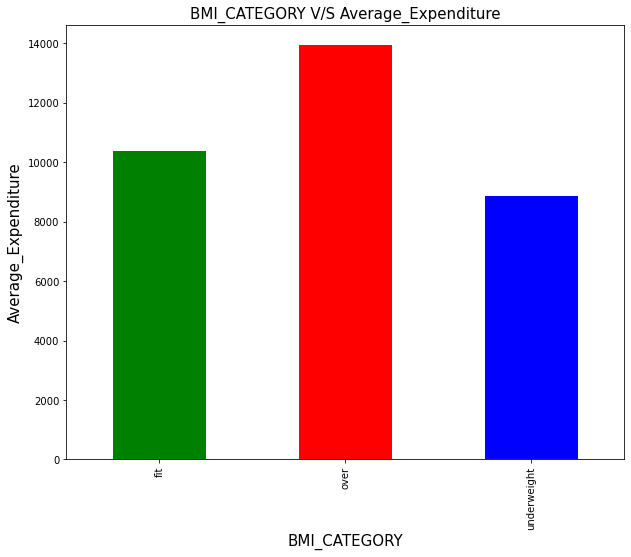

In [160]:
plt.figure(figsize=(10,8))
a1.plot.bar(color=['green','red','blue'])
plt.xlabel('BMI_CATEGORY',size=15)
plt.ylabel('Average_Expenditure',size=15)
plt.title('BMI_CATEGORY V/S Average_Expenditure',size=15)

 13. Draw line plot of expenditure against age and BMI

Text(0.5, 1.0, 'line plot of expenditure against age and BMI')

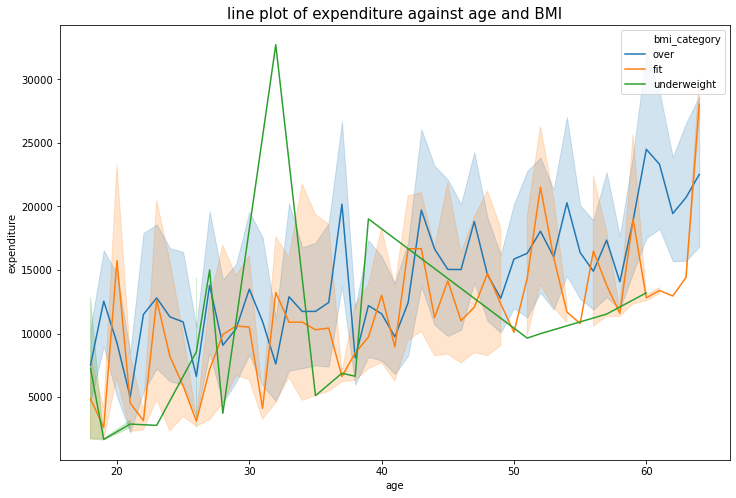

In [161]:
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='expenditure',data=df,hue='bmi_category',legend='full')
plt.title('line plot of expenditure against age and BMI',fontsize=15)

 14. Draw a bar chart to show zone wise average expenditure

In [162]:
df.groupby('zone').mean()['expenditure']

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

In [163]:
zone=df.groupby('zone').mean()['expenditure']
print(zone)

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64


Text(0.5, 1.0, 'Different zones v/s average expenditure')

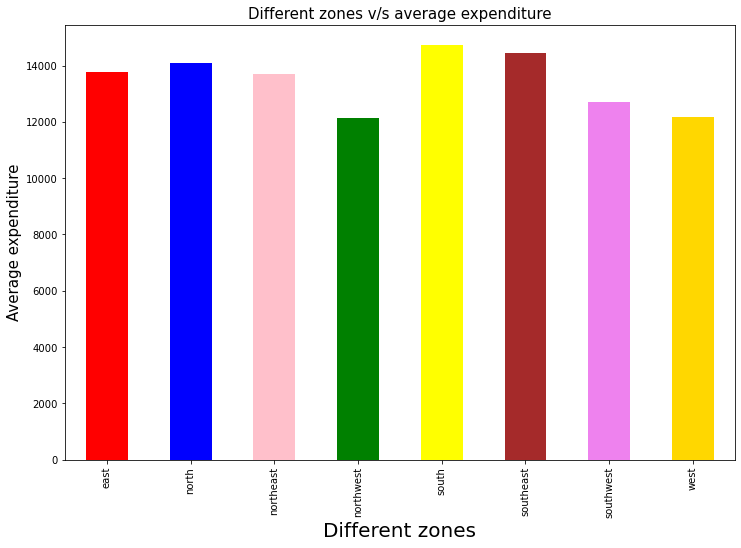

In [164]:
plt.figure(figsize=(12,8))
zone.plot.bar(color=['red','blue','pink','green','yellow','brown','violet','gold'])
plt.xlabel('Different zones',size=20)
plt.ylabel("Average expenditure",size=15)
plt.title('Different zones v/s average expenditure',size=15)

15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

In [165]:
alcohol_habits=df.groupby(['alcohol']).mean()['expenditure']
alcohol_habits

alcohol
daily      13001.772968
no         14277.090885
party      13050.583157
rarely     12419.686784
weekend    13145.632539
Name: expenditure, dtype: float64

Text(0.5, 1.0, 'Alcohol Habits V/S  Average Expenditure')

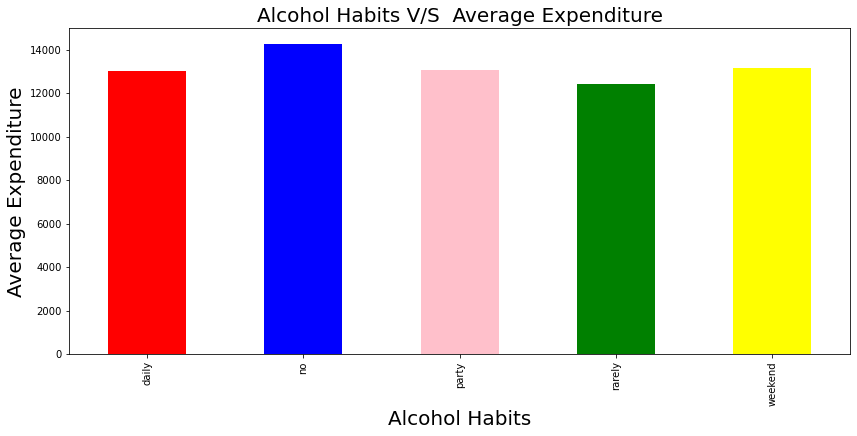

In [166]:
plt.figure(figsize=(14,6))

alcohol_habits.plot.bar(color=['red','blue','pink','green','yellow'])
plt.xlabel('Alcohol Habits' ,fontsize=20)
plt.ylabel('Average Expenditure',fontsize=20)
plt.title('Alcohol Habits V/S  Average Expenditure',fontsize=20)

In [167]:
smoke_habits=df.groupby(['smoke']).mean()['expenditure']
smoke_habits

smoke
no      8434.268298
yes    32050.231832
Name: expenditure, dtype: float64

Text(0.5, 1.0, 'Smoking Habits V/S  Average Expenditure')

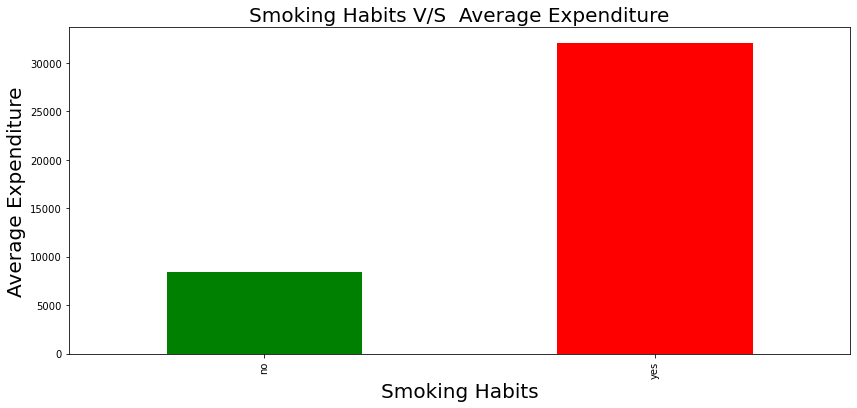

In [168]:
plt.figure(figsize=(14,6))

smoke_habits.plot.bar(color=['green','red'])
plt.xlabel('Smoking Habits' ,fontsize=20)
plt.ylabel('Average Expenditure',fontsize=20)
plt.title('Smoking Habits V/S  Average Expenditure',fontsize=20)

16. Draw pie chart for alcohol consumption habits

In [169]:
df.alcohol.value_counts()

daily      395
weekend    347
party      278
no         259
rarely      59
Name: alcohol, dtype: int64

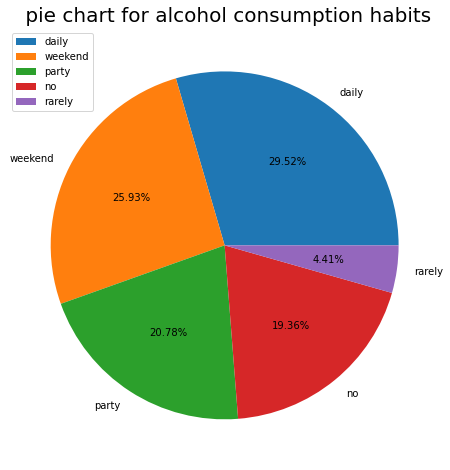

In [170]:
plt.figure(figsize=(12,8))

divisions=['daily','weekend','party','no','rarely']
plt.pie(x=(df.alcohol.value_counts()),labels=divisions,autopct='%1.2f%%')

plt.title(' pie chart for alcohol consumption habits',fontsize=20)
plt.legend(loc=2)

17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

In [171]:
df.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,bmi_category
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400,over
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230,over
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200,over
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061,fit
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520,over


Text(0.5, 1.0, ' scatterplot to see the relation between age and expenditure, keep smoking habit as hue')

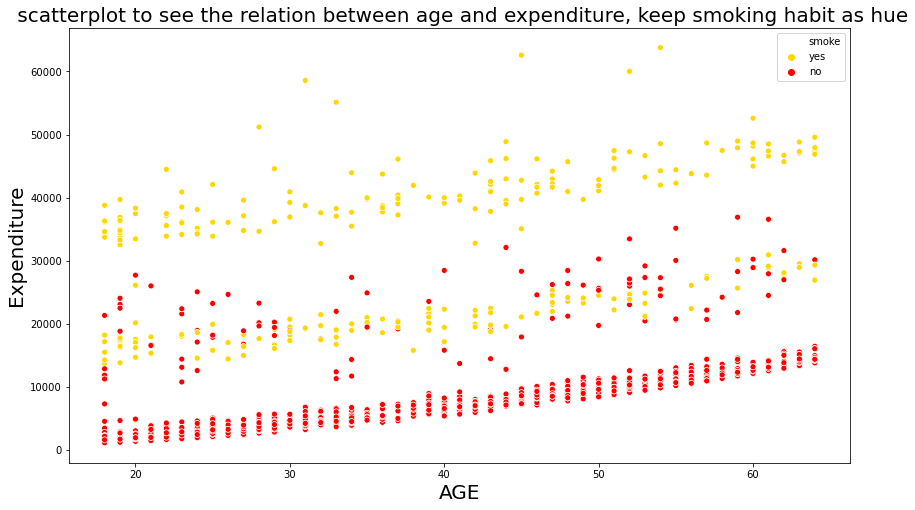

In [172]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=df['age'],y=df['expenditure'],hue=df['smoke'],palette={'yes':'gold','no':'red'})
plt.xlabel('AGE',fontsize=20)
plt.ylabel('Expenditure',fontsize=20)
plt.title(' scatterplot to see the relation between age and expenditure, keep smoking habit as hue',fontsize=20)

 18. Draw distribution plot of expenditure

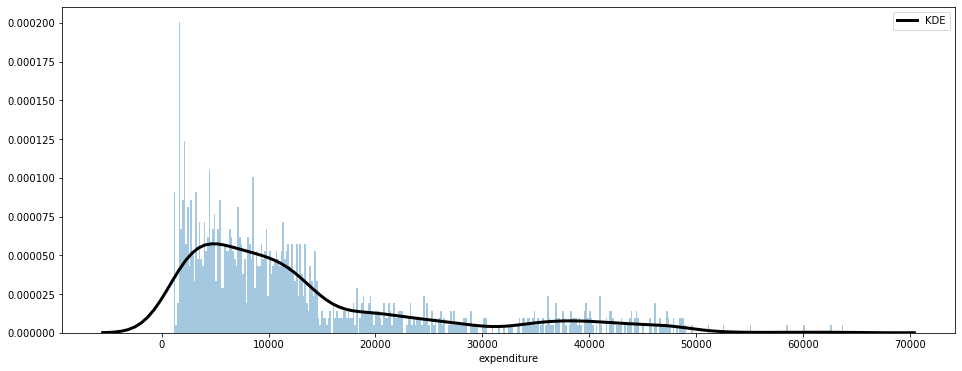

In [173]:
plt.figure(figsize=(16,6))

exp=df.expenditure

sns.distplot(exp,bins=400,kde_kws={"color": "black", "lw": 3, "label": "KDE"})

 19. Display the pairplot

<Figure size 720x432 with 0 Axes>

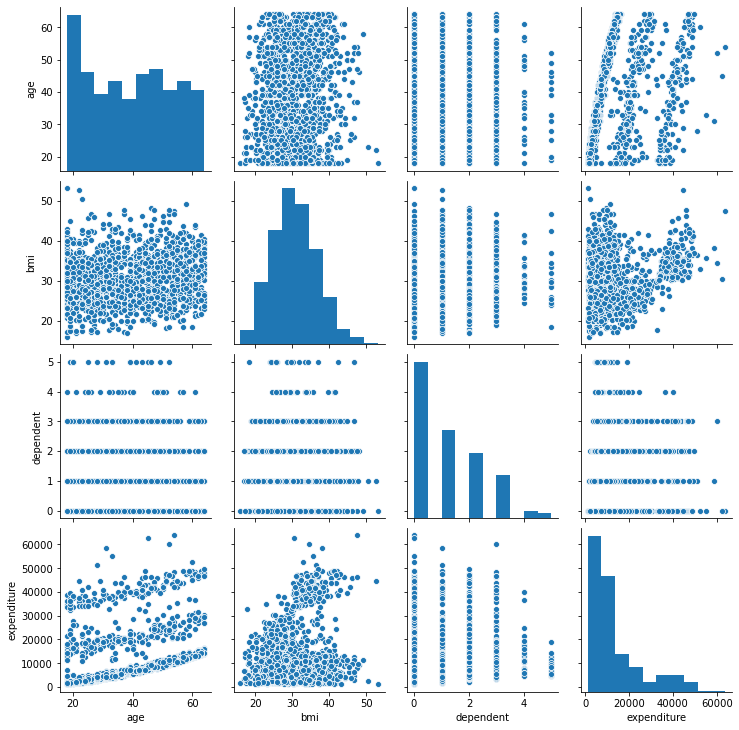

In [174]:
plt.figure(figsize=(10,6))

sns.pairplot(df)

20. Display heatmap for the data

In [175]:
df.corr()

,age,bmi,dependent,expenditure
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
dependent,0.042469,0.012759,1.000000,0.067998
expenditure,0.299008,0.198341,0.067998,1.000000


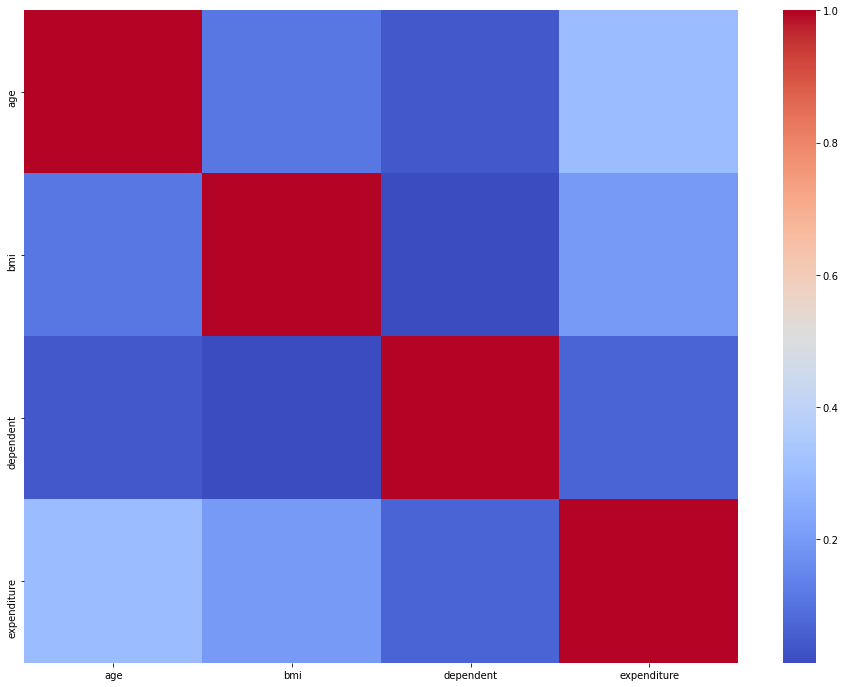

In [176]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),cmap='coolwarm')